# Experiment on Central Limit Theorem: San Francisco Library Usage 

## 1. Introduction

In this assignment, we are going to conduct an experiment on central limit theory using the dataset from San Francisco library usage. The library system is composed of records including patron type, total checkouts and renewals, age range, etc. The dataset includes 423,448 records, from 2003 year to 2016 year. For more information on specific columns refer to the official data dictionary and the information in the Column Metadata on the /Data tab. 

We will take column "total checkouts", which showed how many times the patron has been used on books in the library system since first registering. 
By taking numbers of the column, we'll perform random sampling and compute the mean, meadian and standard deviation to experiment central limit theorem.

### Dataset: https://www.kaggle.com/datasf/sf-library-usage-data/kernels

### Distribution: Exponential distribution (TBD)

### Parameters: mean, median, standard deviation

We will do experiment with different numbers of samples count (10,30,100) and different sample sizes (30,100,1000).

### Sample Count: 10, 30, 100

### Sample Size: 30,100, 1000

## 2. Experiment on Central Limit Theory

### 2.1 Data Loading

Take a look at library data first. Import pandas library to help us understand type of library data.
we will only choose number(integer, float) column to do this exercise. 
In this experiment, we pick the column - Total Checkouts to analyse the frequency of people to checking out books from library.
As info() showed, most of the column are objects, which we are not interested in this time. So we can remove those cloumn in the next step.

In [114]:
import pandas as pd

In [115]:
library = pd.read_csv("Library_Usage.csv", encoding = "unicode_escape")

we can see the data size is 423448. Most of them are objects.

In [116]:
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
Patron Type Code                423448 non-null int64
Patron Type Definition          423448 non-null object
Total Checkouts                 423448 non-null int64
Total Renewals                  423448 non-null int64
Age Range                       423233 non-null object
Home Library Code               423408 non-null object
Home Library Definition         423448 non-null object
Circulation Active Month        423448 non-null object
Circulation Active Year         423448 non-null object
Notice Preference Code          423448 non-null object
Notice Preference Definition    423448 non-null object
Provided Email Address          423448 non-null bool
Year Patron Registered          423448 non-null int64
Outside of County               423448 non-null bool
Supervisor District             313138 non-null float64
dtypes: bool(2), float64(1), int64(4), object(8)
memory usage: 42.8+ MB

In [117]:
library.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


### 2.2 Data Tidying

we are going to clean the data to make it easy to oberseve and calculate.

Check if there is any null row in Total Checkouts column. If yes, we need to add a defalt value, such as 0 in it. If no, we can just keep going.

In [118]:
library.isnull().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

It seems like there are too many columns we don't want use and reference, we can remove them by using drop() function.
After the column- Age range, those information are personal data, recording about preference of individual (home library, active time, contact way...etc). Those are not related to the value of borrowing books. 

In [119]:
library = library.drop(["Home Library Code", "Home Library Definition", "Circulation Active Month", "Circulation Active Year", "Notice Preference Code", "Notice Preference Definition", "Provided Email Address", "Year Patron Registered", "Outside of County", "Supervisor District"], axis = 1)

Also, we change column name to avoid any blank space inside the column. It will be a problem when we create a function with blank space in it. 
By using bottom line between each words, we can rename each column.

In [120]:
library.columns = ["Patron_type_code", "Patron_type", "Total_checkouts", "Total_renewals", "Age_range"]

Now, taking a look at the first 5 rows again. It is easier for us to observe the data.

In [121]:
library.head()

,Patron_type_code,Patron_type,Total_checkouts,Total_renewals,Age_range
0,3,SENIOR,28,13,65 to 74 years
1,0,ADULT,21,10,55 to 59 years
2,0,ADULT,275,559,60 to 64 years
3,0,ADULT,73,38,45 to 54 years
4,0,ADULT,182,90,45 to 54 years


Using describe() function to know distribution of Total_checkouts column. As below information, total counts are 423448. 
Mean, 25%, 50%, 75%, max, min and standrad devision are showed. We found that the std number is quite big, it means there might be some outliers in it.

In [122]:
library.Total_checkouts.describe()

count    423448.000000
mean        161.982097
std         453.703678
min           0.000000
25%           2.000000
50%          19.000000
75%         113.000000
max       35907.000000
Name: Total_checkouts, dtype: float64

Import seaborn library to do a simple graph. X axis is the value of each person who checking out books. Y axis is quantity of people.
As the graph showed, outliers occured when approaching to maxinum. On the other hand, there are many spots in the minium area, 
so we can assume there are no outliers when approaching to minium. 

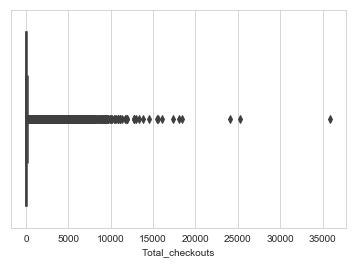

In [123]:
import seaborn as sns
sns.boxplot(x=library["Total_checkouts"])


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'frequency')

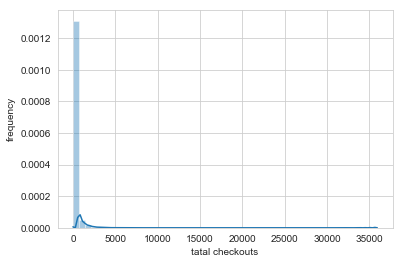

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig = sns.distplot(library["Total_checkouts"])
ax.set_xlabel('tatal checkouts')
ax.set_ylabel('frequency')

According to above figure, there are many records that has a number of outliers in Total_checkouts. 


Hence, we can remove those numbers which above q3 + 1.5 * IQR


IQR(interquartile range) =  Q3 – Q1 
if a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, 
it is viewed as being too far from the central values. It might be not reasonable.

In [125]:
q1 = library.Total_checkouts.quantile(0.25)
q3 = library.Total_checkouts.quantile(0.75)
IQR = q3 - q1
library = library[library.Total_checkouts < (q3 + 1.5 * IQR)]

Checked with the data again to see how many data we remove. Right now, the std seems to be reasonable. 

In [126]:
library.Total_checkouts.describe()

count    363702.000000
mean         40.675116
std          61.597846
min           0.000000
25%           1.000000
50%          11.000000
75%          53.000000
max         279.000000
Name: Total_checkouts, dtype: float64

In [127]:
library.Total_checkouts.median()

11.0

By drawing a histogram graph, we can view the distribution of tatal checkouts. 

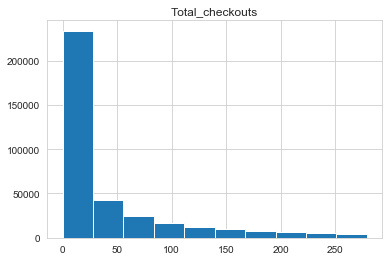

In [128]:
histogram = library.hist("Total_checkouts")

Try to check if the graph is normal distribution. We calculated the data within (mean + 1 sd). Because it is higher than 0.68, it's not a normal distribution(0.86).
It is assuming as an exponential distribution.

*A good tutorials for fitting distribution: http://www.insightsbot.com/fitting-probability-distributions-with-python/

In [129]:
len(library[library.Total_checkouts < (40.7+61.6)])/len(library) 

0.8580128786753991

Import random, numpy, statistics library to create function in next step.
Our dataset is 36372 after removing outliers. Also, we assume it as a exponential distribution.
Now, we are going to gernerate random sample 360000, and calculate the exponential value. 

Exponential distribution.
#random.expovariate(1.0 divided by the desired meand)

In [130]:
import random
import numpy as np
exp_values = [int(random.expovariate(1/40)) for i in range(360000)]

#exp_values = np.array(exp_values)
#values, frequencies = np.unique(exp_values, return_counts = True)
#sns.set_style('whitegrid')
#axes2 = sns.barplot(x = values, y = frequencies, color = "green")
#axes2.set_title('Exponential Number Distribution')
#axes2.set(xlabel='Exponential Number', ylabel='Frequency')

*stdev is used when the data is just a sample of the entire population. 

*pstdev is used when the data represents the entire population.

In [131]:
import statistics as st
print(st.mean(exp_values))
print(st.pstdev(exp_values))

39.56133333333333
40.16005498004205


### 2.3 Functions

#### Draw samplings from the data

In [132]:
from random import sample
def drawSamplings(data, column, count, size, par):
    list = [i for i in data[column]]
    collection = [] # create a sample lists
    for i in range(count):
        samp = sample(list, size) # return a list of sampling values
        s = round(par(samp),2)
        collection.append(s)
    return collection  

#### Create a barplot using searborn chart
Define a function called graphHist(), which can use seaborn library and display a barplot.

*Additional seaborn graphing tutorial: https://elitedatascience.com/python-seaborn-tutorial

In [133]:
def graphHist(data):
    sns.set_style('whitegrid')
    axes = sns.distplot(data)
    axes.set_title('San Francisco library usage')
    axes.set(xlabel='count of Total checkouts', ylabel='Frequency')

### generate the statistics of sampling distribution

In [134]:
import statistics as st
def getSta(data):
    estmean = st.mean(data)
    esterror = st.stdev(data)
    return (estmean, esterror)

Below three functions are print() function to display mean, median, and standard deviation of each amount of sample.

The funciton call abvove getSta() funciton, and return [0] index of mean ; [1] index of standard deviation error. 

In [135]:
def print_mean(data):
    st = getSta(data)
    print(f"The estimated mean of total checkouts: {st[0]:5.2f}")
    print(f"The standard error of total checkouts: {st[1]:5.2f}")

In [136]:
def print_median(data):
    st = getSta(data)
    print(f"The estimated median of total checkouts: {st[0]:5.2f}")
    print(f"The standard error of total checkouts: {st[1]:5.2f}")

In [137]:
def print_std(data):
    st = getSta(data)
    print(f"The estimated standard deviation of total checkouts: {st[0]:5.2f}")
    print(f"The standard error of total checkouts: {st[1]:5.2f}")

#### Test the function

Check whether functions are work. Take sample count= 10, sample size = 30 to calculate.
It will return a list of ____________, estimated mean and standard error.

[28.13, 30.37, 30.27, 45.7, 21.47, 47.3, 34.63, 37.33, 36.8, 34.03]
The estimated mean of total checkouts: 34.60
The standard error of total checkouts:  7.80


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


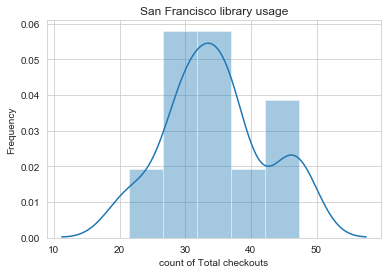

In [138]:
import statistics as st
import numpy as np
par1 = st.mean
c = drawSamplings(library, "Total_checkouts", 10, 30, par1)
print(c)
graphHist(c)
print_mean(c)

### Calaulate the statistics Mean, Median, Standard Deviation of sampling distribution
### 2.4 Mean

#### Using two statement, Same sample count 100, sample size change 30, 100, 1000

sample count = 100, sample size = 30

The estimated mean of total checkouts: 42.01
The standard error of total checkouts: 11.12


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


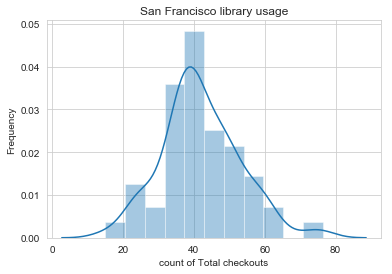

In [139]:
c1 = drawSamplings(library, "Total_checkouts", 100, 30, par1)
graphHist(c1)
print_mean(c1)

sample count = 100, sample size = 100

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated mean of total checkouts: 39.85
The standard error of total checkouts:  6.08


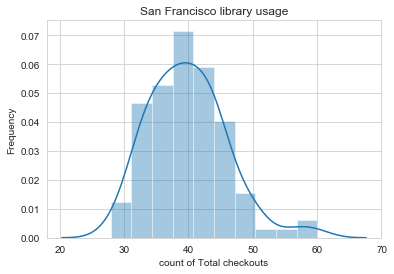

In [140]:
c2 = drawSamplings(library, "Total_checkouts", 100, 100, par1)
graphHist(c2)
print_mean(c2)

sample count = 100, sample size = 1000

The estimated mean of total checkouts: 40.89
The standard error of total checkouts:  1.86


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


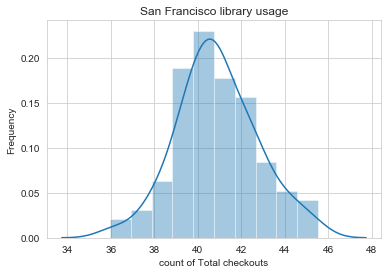

In [141]:
c3 = drawSamplings(library, "Total_checkouts", 100, 1000, par1)
graphHist(c3)
print_mean(c3)

#### Using two statement, Same sample size 1000, sample count change 10, 30, 100

sample count = 10, sample size = 1000

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated mean of total checkouts: 40.06
The standard error of total checkouts:  1.90


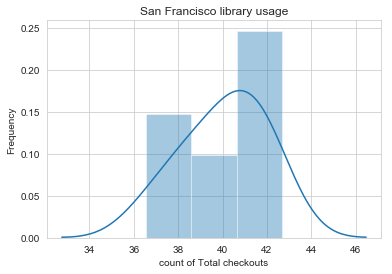

In [142]:
c4 = drawSamplings(library, "Total_checkouts", 10, 1000, par1)
graphHist(c4)
print_mean(c4)

#### sample count = 30, sample size = 1000

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated mean of total checkouts: 40.96
The standard error of total checkouts:  1.84


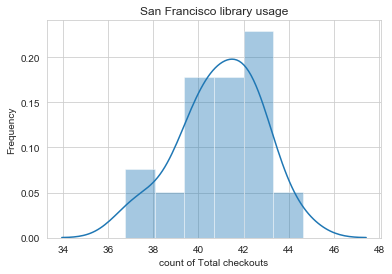

In [143]:
c5 = drawSamplings(library, "Total_checkouts", 30, 1000, par1)
graphHist(c5)
print_mean(c5)

#### sample count = 100, sample size = 1000

The estimated mean of total checkouts: 40.74
The standard error of total checkouts:  1.95


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


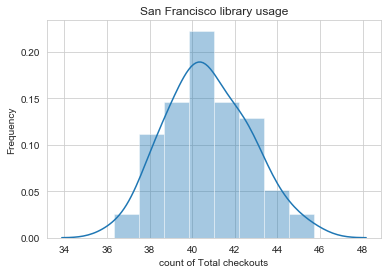

In [144]:
c6 = drawSamplings(library, "Total_checkouts", 100, 1000, par1)
graphHist(c6)
print_mean(c6)

### 2.5 Median
#### Using two statement, Same sample count 100, sample size change 30, 100, 1000

sample count = 100, sample size = 30

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated median of total checkouts: 13.24
The standard error of total checkouts:  7.60


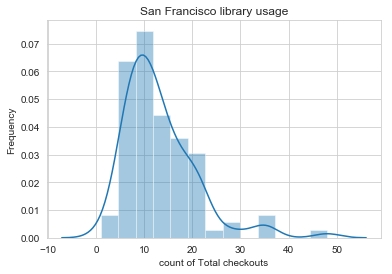

In [145]:
par2 = st.median
c7 = drawSamplings(library, "Total_checkouts", 100, 30, par2)
graphHist(c7)
print_median(c7)

sample count = 100, sample size = 100

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated median of total checkouts: 10.95
The standard error of total checkouts:  3.26


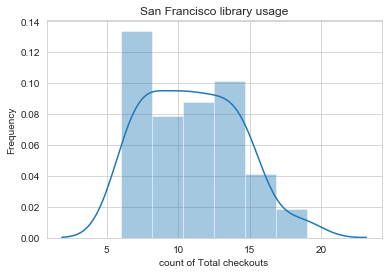

In [146]:
c8 = drawSamplings(library, "Total_checkouts", 100, 100, par2)
graphHist(c8)
print_median(c8)

sample count = 100, sample size = 1000

The estimated median of total checkouts: 11.22
The standard error of total checkouts:  1.26


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


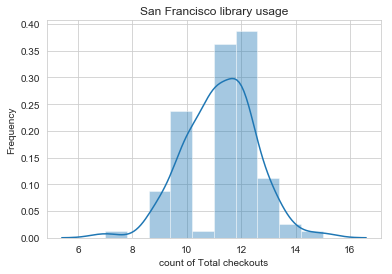

In [147]:
c9 = drawSamplings(library, "Total_checkouts", 100, 1000, par2)
graphHist(c9)
print_median(c9)

#### Using two statement, Same sample size 1000, sample count change 10, 30, 100

sample count = 10, sample size = 1000

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated median of total checkouts: 11.30
The standard error of total checkouts:  1.09


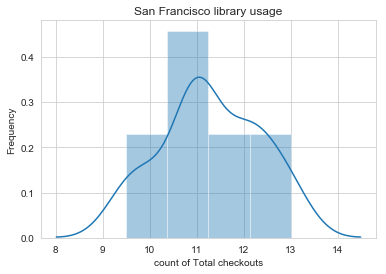

In [148]:
c10 = drawSamplings(library, "Total_checkouts", 10, 1000, par2)
graphHist(c10)
print_median(c10)

#### sample count = 30, sample size = 1000

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated median of total checkouts: 10.98
The standard error of total checkouts:  1.24


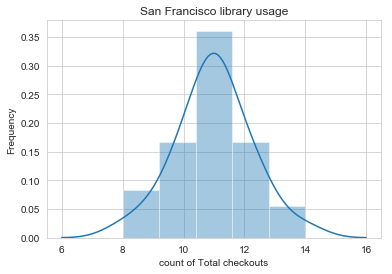

In [149]:
c11 = drawSamplings(library, "Total_checkouts", 30, 1000, par2)
graphHist(c11)
print_median(c11)

#### sample count = 100, sample size = 1000

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated median of total checkouts: 11.32
The standard error of total checkouts:  1.19


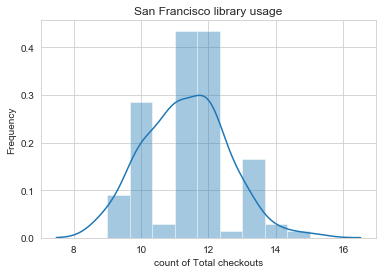

In [150]:
c12 = drawSamplings(library, "Total_checkouts", 100, 1000, par2)
graphHist(c12)
print_median(c12)

### 2.4 Standard Deviation

#### Using two statement, Same sample count 100, sample size change 30, 100, 1000

sample count = 100, sample size = 30

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated standard deviation of total checkouts: 61.30
The standard error of total checkouts: 13.64


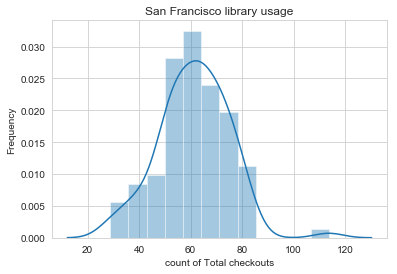

In [151]:
par3 = st.stdev
c13 = drawSamplings(library, "Total_checkouts", 100, 30, par3)
graphHist(c13)
print_std(c13)

sample count = 100, sample size = 100

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The estimated standard deviation of total checkouts: 60.53
The standard error of total checkouts:  6.60


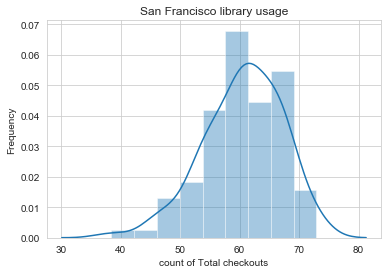

In [152]:
c14 = drawSamplings(library, "Total_checkouts", 100, 100, par3)
graphHist(c14)
print_std(c14)

sample count = 100, sample size = 1000

The estimated standard deviation of total checkouts: 61.60
The standard error of total checkouts:  2.20


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


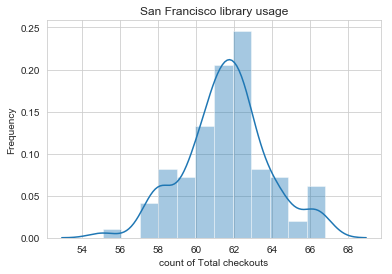

In [153]:
c15 = drawSamplings(library, "Total_checkouts", 100, 1000, par3)
graphHist(c15)
print_std(c15)

#### Using two statement, Same sample size 1000, sample count change 10, 30, 100

sample count = 10, sample size = 1000

The estimated standard deviation of total checkouts: 61.67
The standard error of total checkouts:  2.64


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


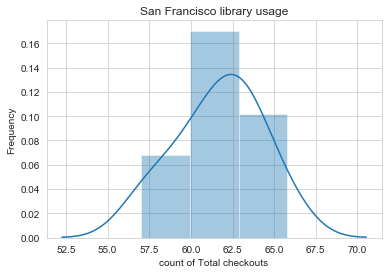

In [154]:
c16 = drawSamplings(library, "Total_checkouts", 10, 1000, par3)
graphHist(c16)
print_std(c16)

sample count = 30, sample size = 1000

The estimated standard deviation of total checkouts: 61.67
The standard error of total checkouts:  2.29


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


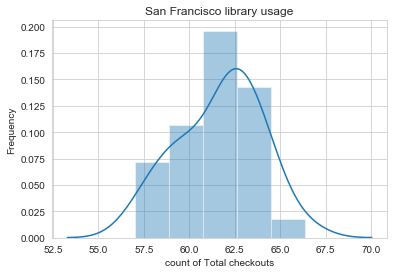

In [155]:
c17 = drawSamplings(library, "Total_checkouts", 30, 1000, par3)
graphHist(c17)
print_std(c17)

sample count = 100, sample size = 1000

The estimated standard deviation of total checkouts: 61.49
The standard error of total checkouts:  2.38


C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


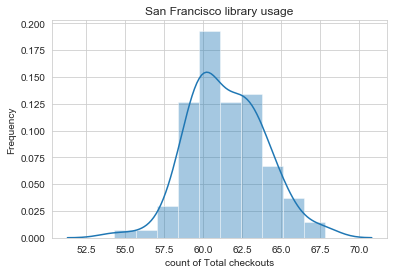

In [156]:
c18 = drawSamplings(library, "Total_checkouts", 100, 1000, par3)
graphHist(c18)
print_std(c18)

#### Summary1:  Sample size is more related to sample count. 
#### Accroding to the table above, fixed the size to larger, no matter how many simple count, the mean is almost the same and st dev are approaching to zero, whcih means more accurate.

#### Summary Mean of  The estimated mean and the standard error of total checkouts:

##### fixed count = 100
<table>
    <tr>
        <th>Count=100</th>
        <th>est mean</th>
        <th>est st error</th>
    </tr>
    <tr>
        <td>size=30</td><td>42.42</td><td>12.17</td>
    </tr>
    <tr>
        <td>size=100</td><td>39.86</td><td>5.84</td>
    </tr>
    <tr>
        <td>size=1000</td><td>40.42</td><td>1.95</td>
    </tr>
</table>

##### fixed size = 1000

<table>
    <tr>
        <th>Size=1000</th>
        <th>est mean</th>
        <th>est st error</th>
    </tr>
    <tr>
        <td>count=10</td><td>40.21</td><td>1.17</td>
    </tr>
    <tr>
        <td>count=30</td><td>40.33</td><td>2.61</td>
    </tr>
    <tr>
        <td>count=100</td><td>40.55</td><td>1.76</td>
    </tr>
</table>

#### Summary 2.from our research, we found that no matter we make sample count or sample size fixed, the estimated mean, median and standard deviation of sample distribution are close to the actual mean, median and standard deviation of population distribution.. Hence the central limit theorem can efficiently estimate the statistics of a larger data.

<table>
    <tr>
        <th>size = 1000, count = 100</th>
        <th>Population Distribution</th>
        <th>Sample Distribution</th>
    </tr>
    <tr>
        <td>mean</td><td>40.68</td><td>40.55</td>
    </tr>
    <tr>
        <td>median</td><td>11.0</td><td>11.27</td>
    </tr>
    <tr>
        <td>std</td><td>61.60</td><td>61.68</td>
    </tr>
</table>

## 4. Additional Topic Discussions

#### 1. What is a good compromise between the number of samples and the sample size? In the real world, it is expensive to do sampling. But you still want the most accurate estimates.

To make more accuacy in our estimation, we require a larger sample size and sample count. A sample size of 30 is usually recommanded and sometimes 40 is a least. Yet for some other distributions that are distinctly not normal(such as multiple peaks, badly skewed, etc), we probably need even larger sample size.
From our result, we can infer that the sample count and sample size do matter in estimating the statistics of population distribution. With Sample count on 100 and sample size on 100, the estimated statistics will be nearly the same with the population statistics.

#### 2. Which population probability distributions are more challenging to estimate their parameters with random sampling? Given what the Central Limit Theorem says about the distributions of the sample statistics, would a normally distributed population be easiest? Would other distributions be harder to make good parameter estimates? If so, why?

According to above mentioned, if the original distribution are closer to normal distribution, the estimation will be easier, as the sample size can be smaller and will reduce the cost. On the other hand, it is harder to make good estimates with distributions that are skewed, multiple peaked or having many outliers since it will cause a problem when drawing samples from the orginal dataset.

#### 3. From the charts in the February 27th set of lecture notes, it appears that estimating the standard deviation parameter is more challenging than estimating the population mean and median. Is that generally true for all population distributions? If so, why?

Gernerally, it is more challenging to choose standard deviation parameter because of outlier. But in out dataset, we remove outliers before we processed the data. Hence our result turns out to be accurate in all parameters(mean, median, std) 

#### 4. For a fixed sample count, what sample sizes are required for the sample distributions to approach normal for each parameter estimation? Is it possible to rank the parameters by the required sample sizes when estimating using random sampling?

From our dataset, we fixed count = 100. Then, we found that when sample size is greater than 100, there are 68% of data between mean +- 1 std. We believe the sample size should greater than 100.
From our data result, we can't rank the parameter between mean, mediem, standard deviation.

<table>
    <tr>
        <th>size = 100, count = 100</th>
        <th>Population Distribution</th>
        <th>Sample Distribution</th>
    </tr>
    <tr>
        <td>mean</td><td>40.42</td><td>40.55</td>
    </tr>
    <tr>
        <td>median</td><td>11.23</td><td>11.27</td>
    </tr>
    <tr>
        <td>std</td><td>61.95</td><td>61.68</td>
    </tr>
</table>

From the following figures we found that given ten as out sample count is a little bit too small that even though we increase the sample size from 30 to 1000, the figure still doesn't appear similar to normal distribution.

C:\Users\hunag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[39.5, 41.48, 36.8, 30.04, 39.7, 35.05, 40.77, 38.17, 33.51, 43.48, 37.21, 46.62, 46.67, 38.61, 37.15, 34.06, 41.18, 46.32, 41.19, 51.57, 32.64, 45.27, 42.75, 39.14, 43.21, 44.64, 32.44, 38.74, 32.3, 28.6, 34.99, 37.56, 47.73, 46.17, 43.47, 38.88, 40.06, 38.92, 41.49, 46.47, 38.46, 48.35, 39.13, 48.06, 31.68, 37.07, 39.08, 51.07, 46.13, 36.98, 41.32, 45.37, 37.23, 40.21, 54.16, 42.33, 35.41, 47.16, 40.18, 36.15, 38.43, 38.15, 39.35, 43.29, 35.84, 37.97, 48.46, 38.83, 36.46, 36.31, 48.61, 36.4, 38.8, 57.99, 39.99, 31.44, 35.78, 34.33, 29.67, 41.95, 50.58, 50.34, 48.62, 37.31, 43.15, 34.35, 34.48, 38.58, 36.97, 25.2, 43.28, 46.65, 42.47, 45.7, 47.7, 33.76, 34.45, 31.54, 48.37, 48.4]
The estimated standard deviation of total checkouts: 40.40
The standard error of total checkouts:  6.02
0.7


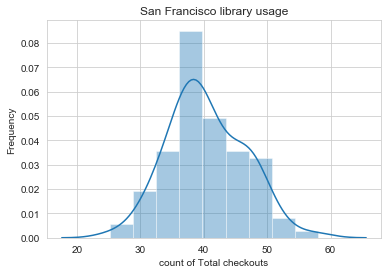

In [157]:
import statistics as st
import numpy as np
par1 = st.mean
t = drawSamplings(library, "Total_checkouts", 100, 100, par1)
print(t)
graphHist(t)
print_std(t)
ts = [i for i in t1 if i < st.mean(t)+st.stdev(t) and i > st.mean(t)-st.stdev(t)]
print(len(ts)/len(t))